In [33]:
import math
import matplotlib.pyplot as plt
import numpy as np

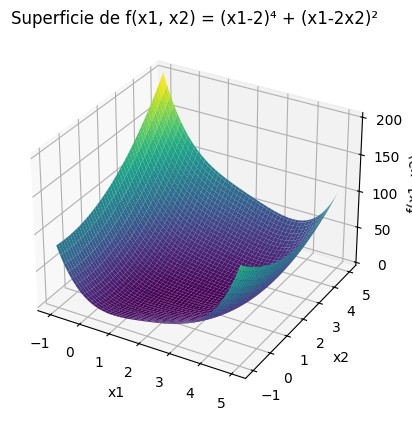

In [34]:
# Definir la función
def f(x1, x2):
  return (x1 - 2)**4 + (x1 - 2*x2)**2

# Generar datos para graficar
x1 = np.linspace(-1, 5, 100)
x2 = np.linspace(-1, 5, 100)
x1, x2 = np.meshgrid(x1, x2)
y = f(x1, x2)

# Graficar la superficie
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y, cmap='viridis')

# Etiquetas y título
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Superficie de f(x1, x2) = (x1-2)⁴ + (x1-2x2)²')

# Mostrar la gráfica
plt.show()

In [35]:
def golden_section_method(ak,bk,x,d):
  l = 0.03
  alpha = 0.618
  lambdak = ak + (1 - alpha) * (bk - ak)
  miuk = ak + alpha * (bk - ak)
  k = 1

  while bk - ak >= l:
    if function(x,lambdak,d) > function(x,miuk,d):
      ak = lambdak
      lambdak = miuk
      miuk = ak + alpha * (bk - ak)

    elif function(x,lambdak,d) <= function(x,miuk,d):
      bk = miuk
      miuk = lambdak
      lambdak = ak + (1 - alpha) * (bk - ak)

    k+= 1
    lambda_gsm = (lambdak+miuk)/2
  return lambda_gsm


def function(x, lambda_val, d):
  x_new = x + lambda_val * d
  return f(x_new[0], x_new[1])

def hooke_jeeves_method(x, epsilon):
  n = len(x)
  d = np.eye(n)
  y = x.copy()  
  k = 1
  print('k =', k, 'xk =', x)
  
  while True:
    for i in range(n):
      lambdaj = golden_section_method(-10, 10, y, d[i])
      y = y + lambdaj * d[i]
    
    xk1 = y
    
    if np.linalg.norm(xk1 - x) < epsilon:
      break
    
    dhj = xk1 - x
    lambda_hat = golden_section_method(-10, 10, xk1, dhj)
    y1 = xk1 + lambda_hat * dhj
    
    x = xk1 
    y = y1  
    k += 1
    print('k =', k, 'xk =', x)
  
  return k, x, xk1


In [36]:
epsilon = 0.01
x = np.array([0, 3])

print(np.vstack((x, np.zeros_like(x, dtype=float))))
result = hooke_jeeves_method(x,epsilon)

[[0. 3.]
 [0. 0.]]
k = 1 xk = [0 3]
k = 2 xk = [3.12317461 1.56493604]
k = 3 xk = [2.70220173 1.34387585]
k = 4 xk = [2.06085793 1.03469878]


Optimization completed in 4 iterations
Final point: x = [2.06085793 1.03469878]
Function value at final point: f(x) = 8.664257926067648e-05


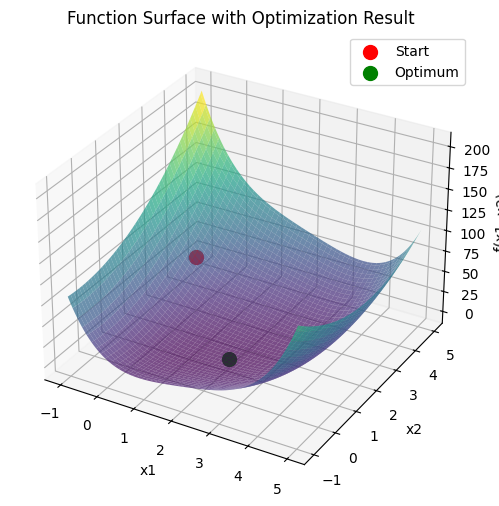

In [37]:
# Create a new figure for the 3D plot only
fig3 = plt.figure(figsize=(8, 6))

# Plot: Original function surface
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot_surface(x1, x2, y, cmap='viridis', alpha=0.7)

# Extract the results
k_final, x_final, x_last = result
print(f"Optimization completed in {k_final} iterations")
print(f"Final point: x = {x_final}")
print(f"Function value at final point: f(x) = {f(x_final[0], x_final[1])}")

# Mark the starting point
ax3.scatter(x[0], x[1], f(x[0], x[1]), color='red', s=100, label='Start')

# Mark the final point
ax3.scatter(x_final[0], x_final[1], f(x_final[0], x_final[1]), color='green', s=100, label='Optimum')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('f(x1, x2)')
ax3.set_title('Function Surface with Optimization Result')
ax3.legend()

plt.show()
